# Part I - (Prosper Loan Dataset Exploration)
## by (Sussan Omeruah)

## Introduction

> Prosper is a lending platform in the U.S. that offers a variety of resources people can use to try and improve their financial health, regardless of their financial situation. 
Users can consolidate debt, improve their home, or finance healthcare costs with personal loans among many other purposes. Investors who may be looking for new opportunities to diversify their portfolio can invest in personal loans.

> This data set contains 113,937 loans with 81 variables on each loan, with duration between november 2005 to march 2014,  including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this data [dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) to understand the dataset's variables.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Upgrade seaborn 
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
# import dataset
loans = pd.read_csv('prosperLoanData.csv')

### View/explore dataset


In [4]:
#view data
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
# View columns and data types
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
# View data summary statistics
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
print(loans.ListingCreationDate.min())

2005-11-09 20:44:28.847000000


In [8]:
print(loans.ListingCreationDate.max())

2014-03-10 12:20:53.760000000


In [9]:
# Checking for missing data
loans.isna().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [10]:
#copy dataset before wrangling
df = loans.copy()

In [11]:
# Select necessary columns

columns=['ListingNumber','ListingCreationDate','Term','LoanStatus','BorrowerRate','BorrowerState','IsBorrowerHomeowner','LoanOriginationDate','LenderYield','LoanOriginalAmount','ListingCategory (numeric)','StatedMonthlyIncome', 'ProsperRating (Alpha)','ProsperRating (numeric)','DebtToIncomeRatio',
         'EmploymentStatus','IncomeRange','MonthlyLoanPayment','Investors','CurrentDelinquencies','AmountDelinquent']
df=df[columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
ListingNumber                113937 non-null int64
ListingCreationDate          113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerRate                 113937 non-null float64
BorrowerState                108422 non-null object
IsBorrowerHomeowner          113937 non-null bool
LoanOriginationDate          113937 non-null object
LenderYield                  113937 non-null float64
LoanOriginalAmount           113937 non-null int64
ListingCategory (numeric)    113937 non-null int64
StatedMonthlyIncome          113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperRating (numeric)      84853 non-null float64
DebtToIncomeRatio            105383 non-null float64
EmploymentStatus             111682 non-null object
IncomeRange                  113937 non-null object
MonthlyL

In [13]:
# Check for missing data
df.isna().sum()

ListingNumber                    0
ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerRate                     0
BorrowerState                 5515
IsBorrowerHomeowner              0
LoanOriginationDate              0
LenderYield                      0
LoanOriginalAmount               0
ListingCategory (numeric)        0
StatedMonthlyIncome              0
ProsperRating (Alpha)        29084
ProsperRating (numeric)      29084
DebtToIncomeRatio             8554
EmploymentStatus              2255
IncomeRange                      0
MonthlyLoanPayment               0
Investors                        0
CurrentDelinquencies           697
AmountDelinquent              7622
dtype: int64

### Handling Missing Data

In [14]:
#fill the missing values of DebttoIncomeRatio with the mean
df.DebtToIncomeRatio = df.DebtToIncomeRatio.fillna(df.DebtToIncomeRatio.mean())


In [15]:
#drop rows of missing data in ProsperRating
df = df[df['ProsperRating (Alpha)'].notnull()]

In [16]:
# Test for missing data
df.isna().sum()

ListingNumber                0
ListingCreationDate          0
Term                         0
LoanStatus                   0
BorrowerRate                 0
BorrowerState                0
IsBorrowerHomeowner          0
LoanOriginationDate          0
LenderYield                  0
LoanOriginalAmount           0
ListingCategory (numeric)    0
StatedMonthlyIncome          0
ProsperRating (Alpha)        0
ProsperRating (numeric)      0
DebtToIncomeRatio            0
EmploymentStatus             0
IncomeRange                  0
MonthlyLoanPayment           0
Investors                    0
CurrentDelinquencies         0
AmountDelinquent             0
dtype: int64

In [17]:
#Adjust Datetime columns
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate']) 
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 21 columns):
ListingNumber                84853 non-null int64
ListingCreationDate          84853 non-null datetime64[ns]
Term                         84853 non-null int64
LoanStatus                   84853 non-null object
BorrowerRate                 84853 non-null float64
BorrowerState                84853 non-null object
IsBorrowerHomeowner          84853 non-null bool
LoanOriginationDate          84853 non-null datetime64[ns]
LenderYield                  84853 non-null float64
LoanOriginalAmount           84853 non-null int64
ListingCategory (numeric)    84853 non-null int64
StatedMonthlyIncome          84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperRating (numeric)      84853 non-null float64
DebtToIncomeRatio            84853 non-null float64
EmploymentStatus             84853 non-null object
IncomeRange                  84853 non-null object
MonthlyL

In [18]:
# Extract year and month from ListingCreationDate
df["ListingYear"] = df["ListingCreationDate"].dt.year
df["ListingMonth"] = df["ListingCreationDate"].dt.month

In [19]:
# Convert ProsperRating & IncomeRange to ordinal categorical 
var_dict = {'ProsperRating (Alpha)': ['HR','E','D','C', 'B', 'A', 'AA'],
                    'IncomeRange':['$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
            'EmploymentStatus':['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']}
for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [20]:
#Adjust datatype for all other categorical columns
df['BorrowerState'] = df['BorrowerState'].astype('category')
df['LoanStatus'] = df['LoanStatus'].astype('category')
df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].astype('category')

In [21]:
# Check size of df
df.shape

(84853, 23)

In [22]:
df.to_csv ('Edit_Prosper_Loan.csv', index = False)


### What is the structure of your dataset?

> The dataset contains columns with information on date, purpose, amount, rates and status of loans.
The size is (84853, 28)

### What is/are the main feature(s) of interest in your dataset?

> I am interested in exploring the factors that affect loan outcome 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am guessing that loan amount, borrower rate and loan status will help my investigation. I also think that some borrower characteristics like loan purpose(ListingCategory) and Loan Term will affect the outcome of a loan 


## Univariate Exploration

I will start from Loan Amount

### Question

What is the distribution of loan amounts?

### Visualization

In [23]:
def plot_histogram(df, column, bin_size):
    # Create bins using specified bin size
    bins = np.arange(0, df[column].max()+bin_size, bin_size)

    # Create a histogram of the specified column
    base_color = sns.color_palette()[0]
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(df[column], bins=bins, color= base_color)

    # Set the chart title and axes labels
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

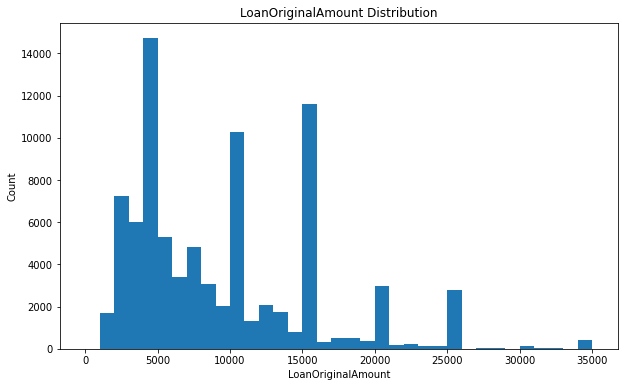

In [24]:
plot_histogram(df,'LoanOriginalAmount',1000)

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


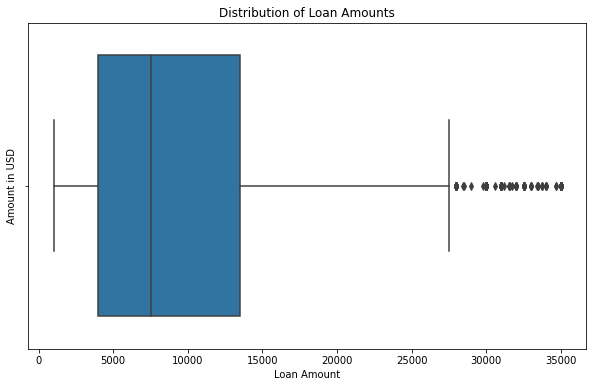

In [25]:
# Create a boxplot to examine outliers
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(df["LoanOriginalAmount"])

# Add labels and title
plt.xlabel("Loan Amount")
plt.ylabel("Amount in USD")
plt.title("Distribution of Loan Amounts");

### Observation

The loan original Amount is multimodal with various peaks,with loan amount of about 5000 having the most peak

The histogram appears to be positively skewed, meaning that there are relatively more loans with lower amounts and fewer loans with higher amounts. 
The long tail towards higher loan amounts suggests that there are some loans with very high amounts that are considered outliers.

### Observation

The median loan amount is around $7500, which is represented by the line in the middle of the box.

The height of the box indicates that half of the loan amounts in the dataset fall between approximately $4000 and 14000

From the boxplot, we can also see that the distribution of loan amounts in the dataset is positively skewed, with a long tail towards higher values, but the highest loan amounts in the dataset are much higher than the median loan amount.


### Question
What are the common reasons for taking loans?

### Visualization

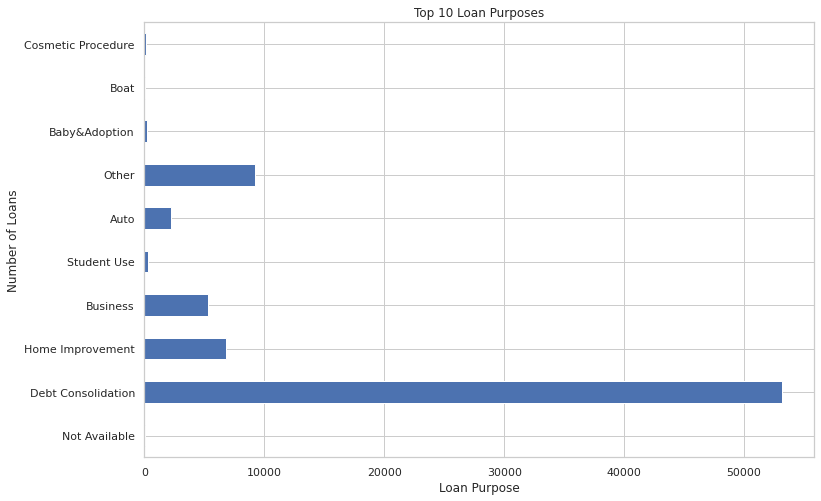

In [63]:

# Count the number of loans for each purpose
purpose_counts = df['ListingCategory (numeric)'].value_counts().sort_index()

# Map the numeric categories to their corresponding string values

listing_category = {
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby&Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'
}

purpose_counts.index = purpose_counts.index.map(listing_category)

# Create a bar chart of the loan purposes
base_color = sns.color_palette()[0]
fig, ax = plt.subplots(figsize=(12, 8)) 
purpose_counts.head(10).plot(kind='barh', color= base_color)

# Set the chart title and axes labels
ax.set_title('Top 10 Loan Purposes')
ax.set_xlabel('Loan Purpose')
ax.set_ylabel('Number of Loans');

### Observation
The most common loan purpose is debt consolidation

### Question

What is the common duration for loans?

### Visualization

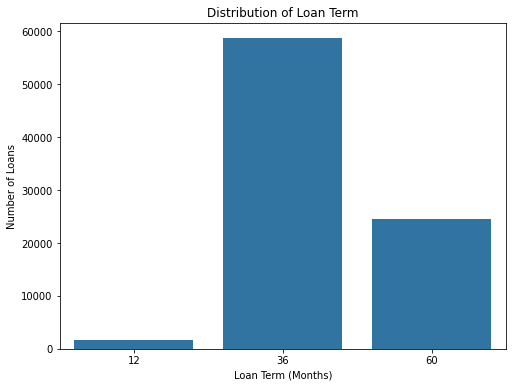

In [27]:
# Set figsize
plt.figure(figsize=[8, 6])

#plot barchart
sns.countplot(x='Term', data=df, color = base_color)

# Add labels and title
plt.xlabel('Loan Term (Months)')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loan Term');

### Observation
Most of the loan duration is 3years and 2years

### Question

What is the distribution of LoanStatus?

### Visualization

In [28]:
df["LoanStatus"].value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

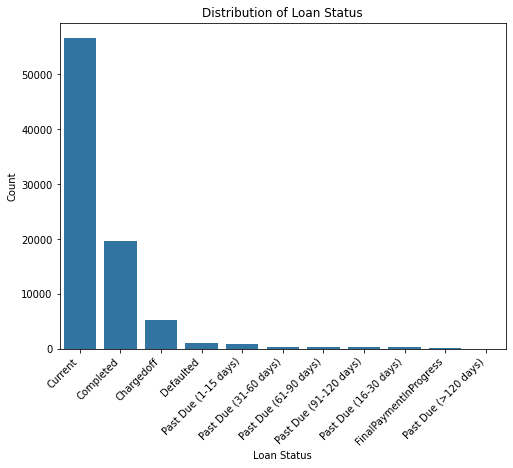

In [29]:
# Create countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='LoanStatus', data=df, order=df['LoanStatus'].value_counts().index, color = base_color)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count');

### Observation
Majority of the loans fall under 'Current' status

### Question
What is the distribution of BorrowerRate, LenderYield?

### Visualization

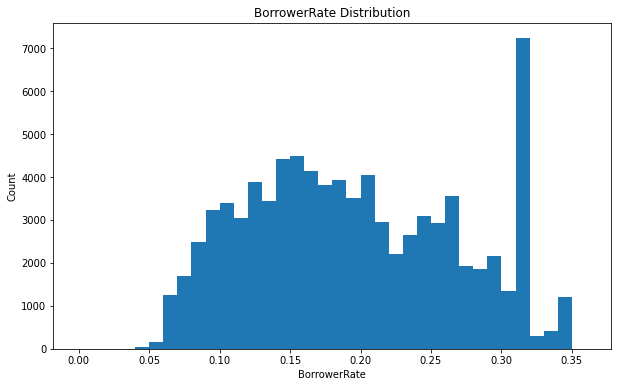

In [30]:
plot_histogram(df,'BorrowerRate', 0.01)

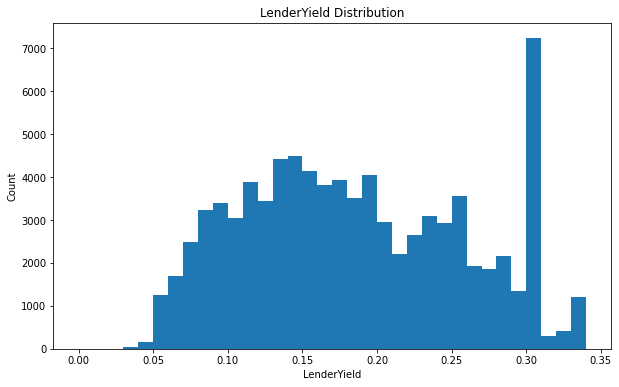

In [31]:
plot_histogram(df, 'LenderYield',0.01)

### Observation
Borrower Rate distribution is multimodal.
The majority of loans have APRs between approximately 0.05 and 0.25. There are also some loans with APRs greater than 0.3 but they are relatively few compared to those in the lower APR ranges.
We have a shape peak between 0.15 and 0.2 and outlier in 0.3

Lender Yield follows the same distribution as borrower rate

### Question
What are the distributions of borrower characteristics like State, employment status, income range, prosper rating, homeowner?

### Visualization

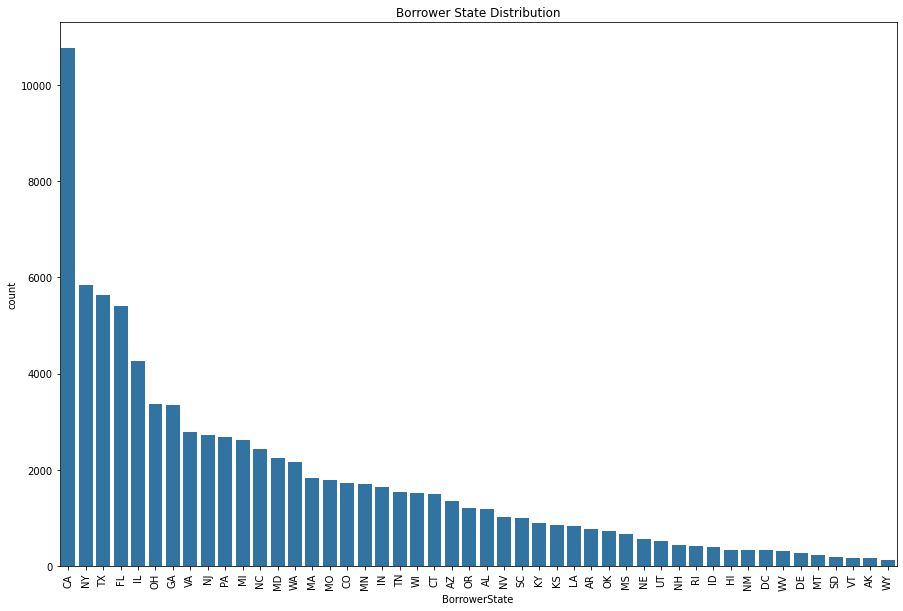

In [32]:
#Borrower State Distribution

state_order = df['BorrowerState'].value_counts().index

base_color = sns.color_palette()[0]
plt.figure(figsize=[15, 10])
sns.countplot(data=df, x='BorrowerState', color=base_color, order=state_order);
plt.title('Borrower State Distribution');
plt.xticks(rotation=90);

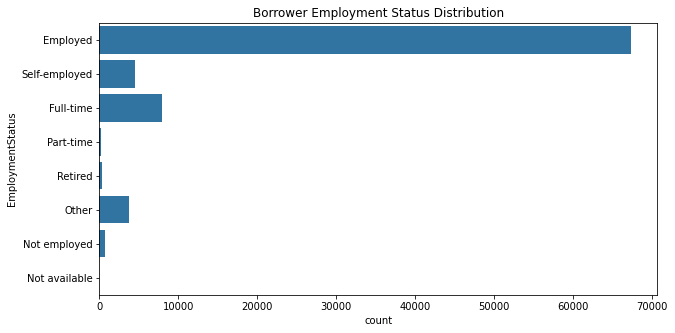

In [33]:
# Borrower Employment Status Distribution

plt.figure(figsize=[10, 5])
sns.countplot(data = df, y = 'EmploymentStatus', color = base_color)
plt.title('Borrower Employment Status Distribution');

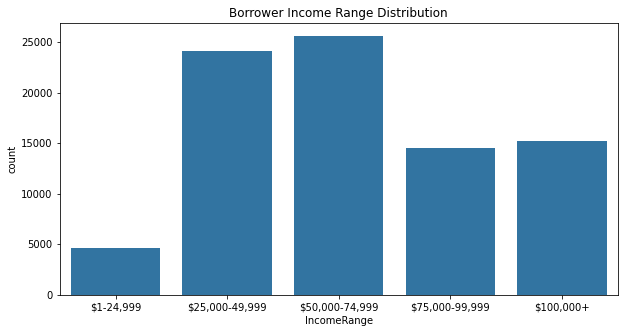

In [34]:
#Borrower Income Range Distrobution

plt.figure(figsize=[10, 5])
sns.countplot(data=df,x='IncomeRange',color=base_color);
plt.title('Borrower Income Range Distribution');

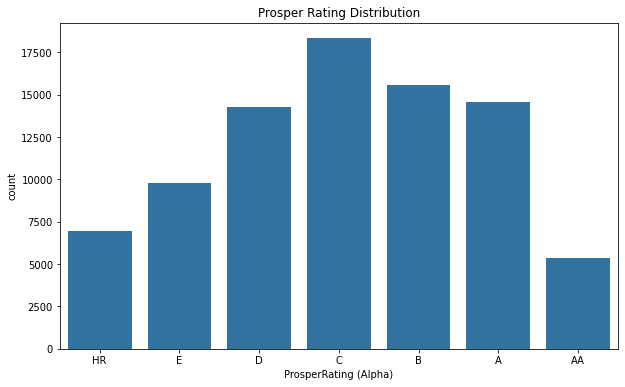

In [35]:
# Prosper Rating Distribution

plt.figure(figsize=[10, 6]);
sns.countplot(data=df, x='ProsperRating (Alpha)', color=base_color);
plt.title('Prosper Rating Distribution');

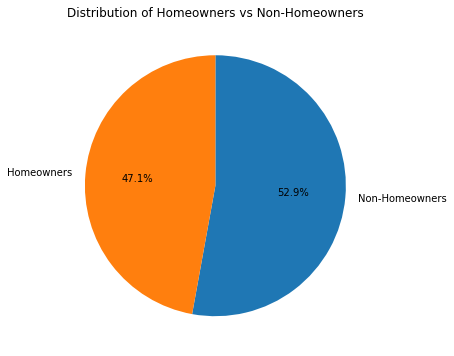

In [36]:
# Create a pie chart of IsBorrowerHomeowner
plt.figure(figsize=[10, 6])
plt.pie(df['IsBorrowerHomeowner'].value_counts(), labels=['Non-Homeowners', 'Homeowners'], 
        autopct='%1.1f%%', startangle = 90,
        counterclock = False)
plt.title('Distribution of Homeowners vs Non-Homeowners');

### Observation

Majority of the borrowers come from California(CA), they're employed, earn between 25,000 to 74,000 dollars, have a 'C' Prosper rating and often own a house


### Question
How are Investors spread out across loans?

### Visualization

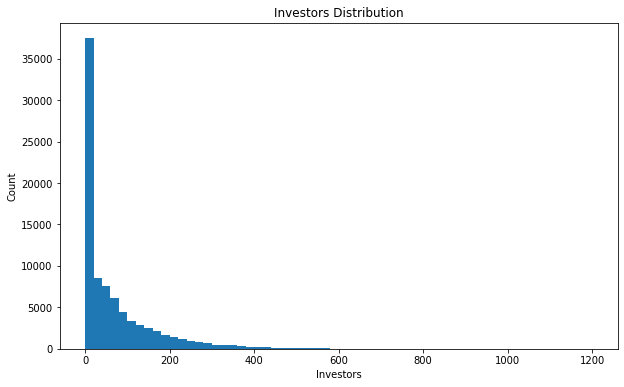

In [37]:
 plot_histogram(df, 'Investors', 20)

This chart is not very informative. Using a logarithmic scale would help to display the smaller values in more detail

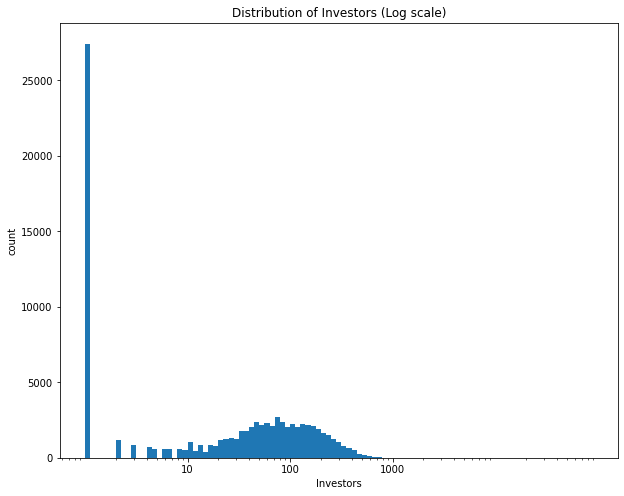

In [38]:
# create histogram of Investors using log scale
log_binsize = 0.05
bins = 10 ** np.arange(0, 5, log_binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df, x = 'Investors', bins = bins)
plt.title('Distribution of Investors (Log scale)')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.ylabel('count');

### Observation

we can see that the majority of the loans have less than 10 investors, with a peak at around 90-100 investors.

### Question
What is the distribution of loan monthly payments?

### Visualization

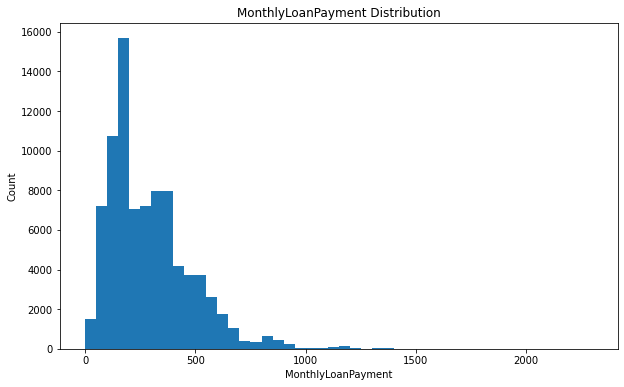

In [39]:
plot_histogram(df,'MonthlyLoanPayment', 50)

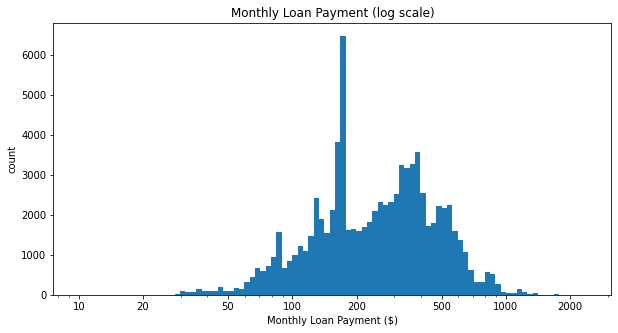

In [40]:
# Taking a closer look using log-scale
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(df['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('count')
plt.title('Monthly Loan Payment (log scale)');

### Observation
Most of the borrowers are scheduled to pay about $180 monthly, although a considerable amount are also scheduled to pay between 300 to 500 dollars monthly

### Question
What is the distribution of delinquent loans?

### Visualization

In [41]:
df['AmountDelinquent'].describe()

count     84853.000000
mean        950.773797
std        7419.574684
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64

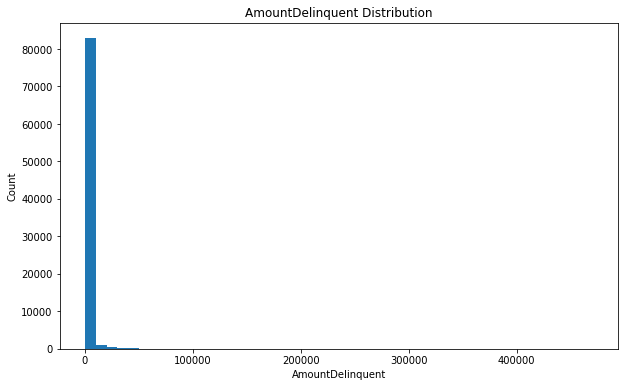

In [42]:
plot_histogram(df,'AmountDelinquent', 10000)

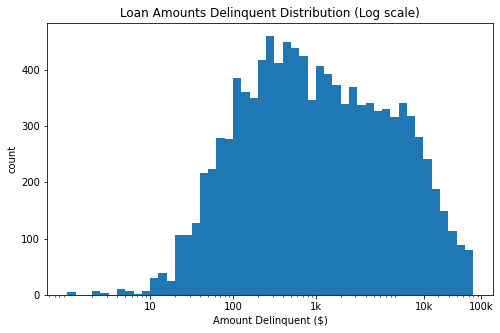

In [43]:
#Amount Delinquent Distribution on a log scale

log_binsize = 0.1
bins = 10 ** np.arange(0,5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'AmountDelinquent', bins = bins)
plt.title('Loan Amounts Delinquent Distribution (Log scale)')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3, 2e4, 1e5], ['10', '100', '1k', '10k', '100k'])
plt.xlabel('Amount Delinquent ($)')
plt.ylabel('count');

### Observation
Most loan amounts delinquent falls around $950 and it is normally distibuted

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Loan Original Amount distribution is right skewed and Borrower Rate distribution is multimodal

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I performed log transformation on the Investors, MonthlyLoanPayments and AmountDelinquent columns in order to take a closer look at the smaller values and interpret the visualization

## Bivariate Exploration

I'd start by looking at the relationships between Numerical variables

In [44]:
numerical_vars = ['Term', 'LoanOriginalAmount', 'BorrowerRate', 'ProsperRating (numeric)', 
                  'LenderYield', 'StatedMonthlyIncome', 'AmountDelinquent','Investors']

categorical_vars = ['Term','ProsperRating (Alpha)', 'EmploymentStatus','Occupation', 
                    'IncomeRange','LoanStatus','BorrowerState','ListingCategory (numeric)']

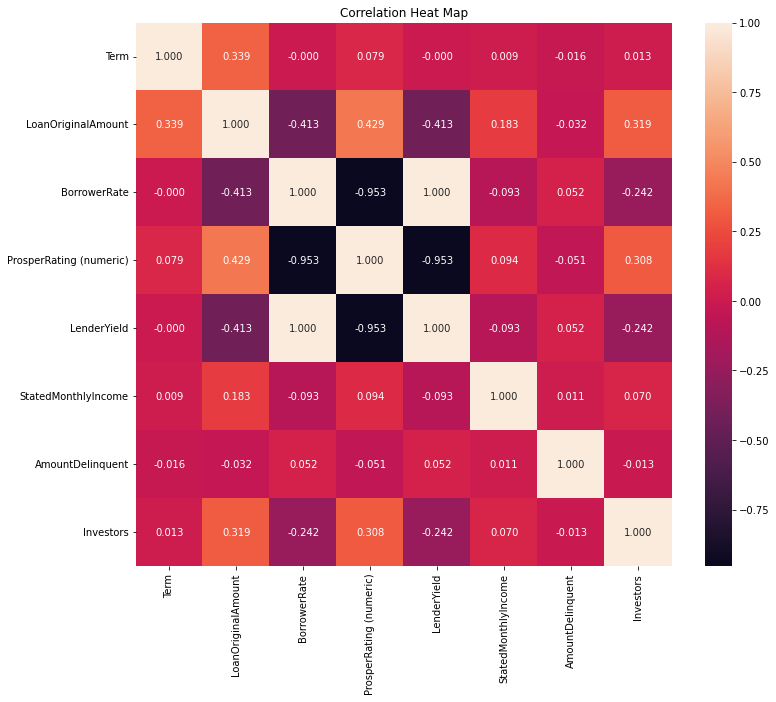

In [45]:
plt.figure(figsize = [12, 10])
sns.heatmap(df[numerical_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'rocket', center = 0)
plt.title('Correlation Heat Map');

df.shape= (84853, 23)
df_samp.shape= (500, 23)


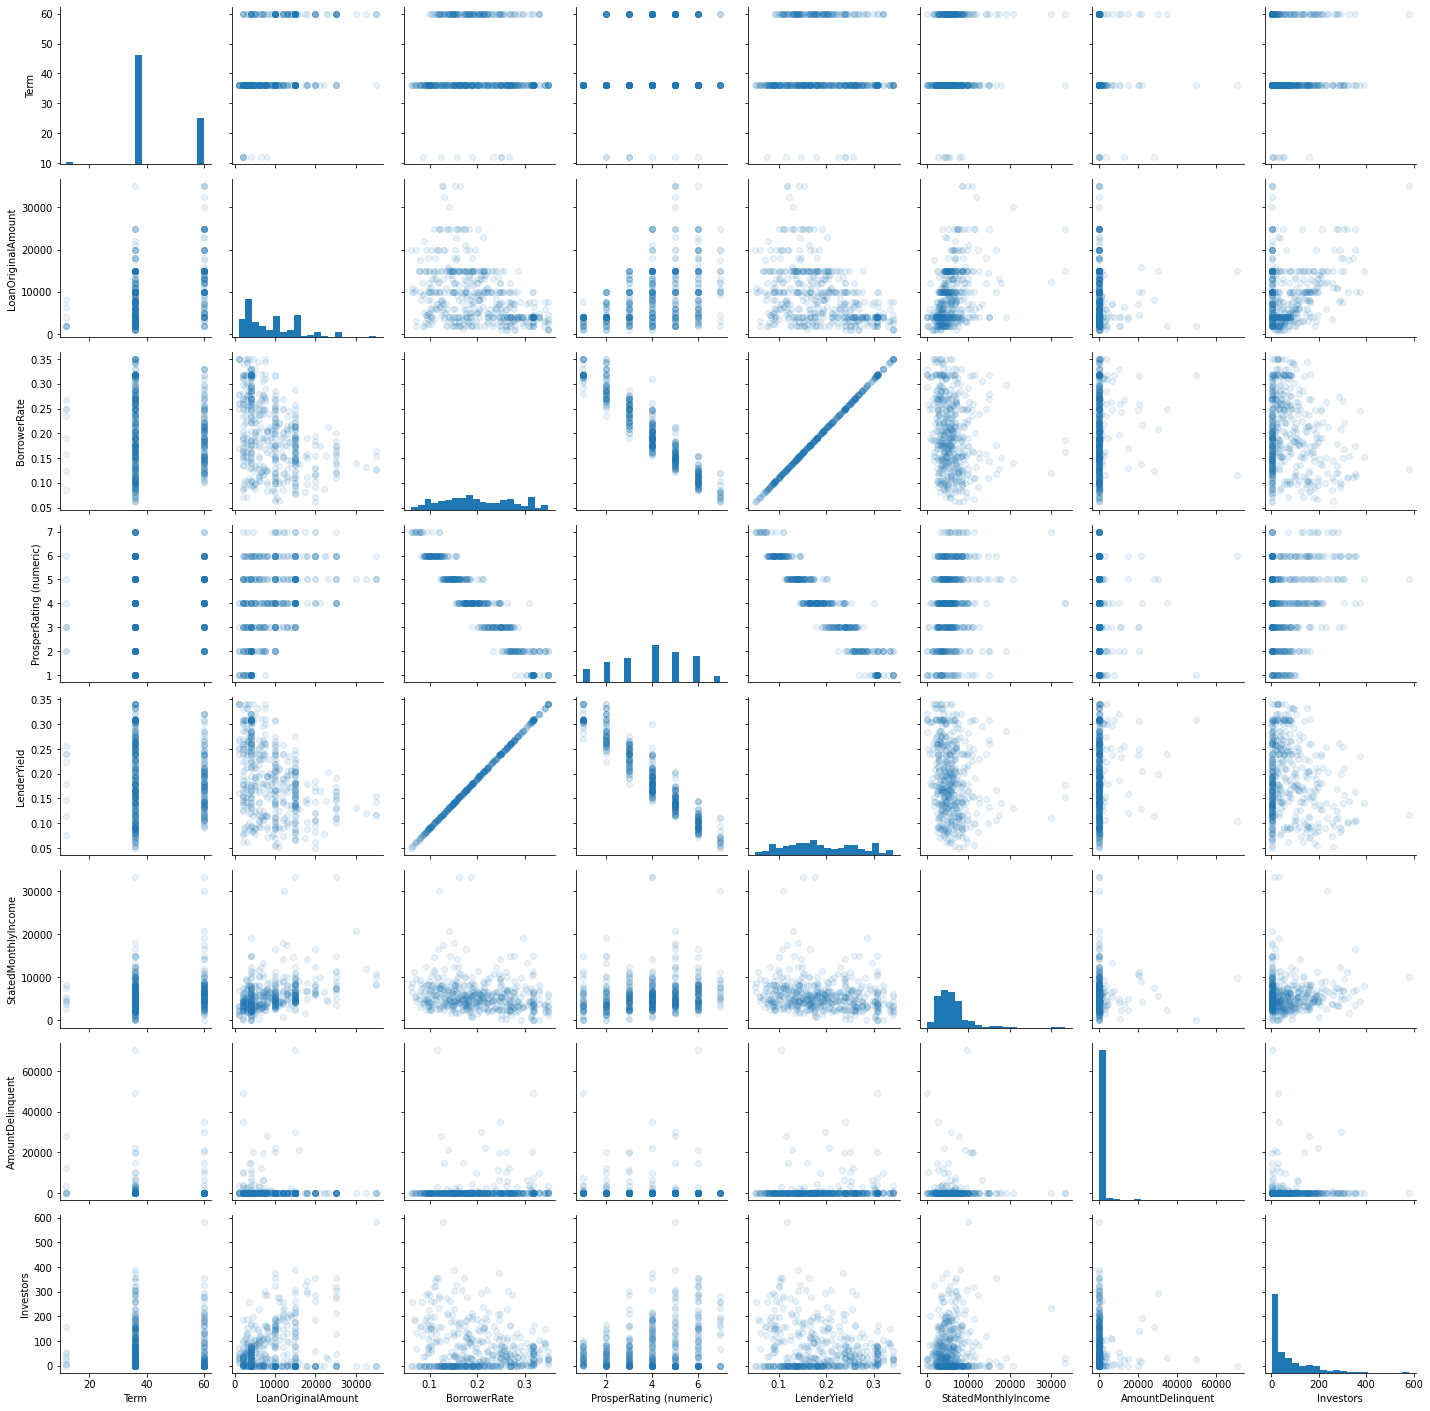

In [46]:
# plot matrix: sample of 600
print("df.shape=",df.shape)
df_samp = df.sample(n=500, replace = False)
print("df_samp.shape=",df_samp.shape)

g = sns.PairGrid(data = df_samp, vars = numerical_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter,alpha=0.1);

### Observation

- LoanOriginalAmount and BorrowerRate are negatively correlated with coefficient of -0.413 which suggests that larger loans have lower borrower rate compared to lesser loans

- Strong positive correlations between Lender yield and Borrower Rate which is logical, higher borrower rates should result in higher lender yield

- Strong negative correlation between Prosper rating and borrower rate, which suggests that high prosper ratings have lower borrower rates

### Question
How has Loan amount changed over time?

### Visualization

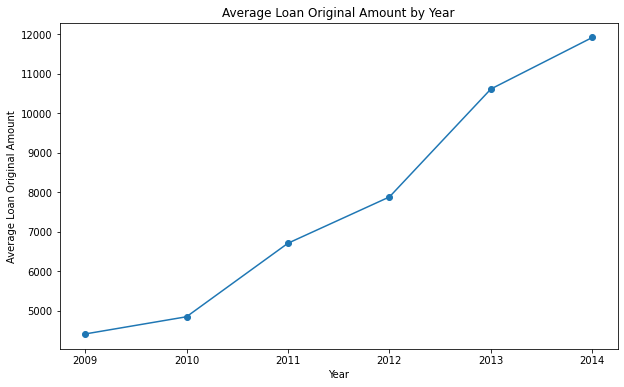

In [47]:
# Calculate the average loan original amount by year
avg_loan_by_year = df.groupby('ListingYear')['LoanOriginalAmount'].mean()

# Create a line plot of the average loan original amount by year
plt.figure(figsize=(10, 6))
plt.plot(avg_loan_by_year.index, avg_loan_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Loan Original Amount')
plt.title('Average Loan Original Amount by Year');

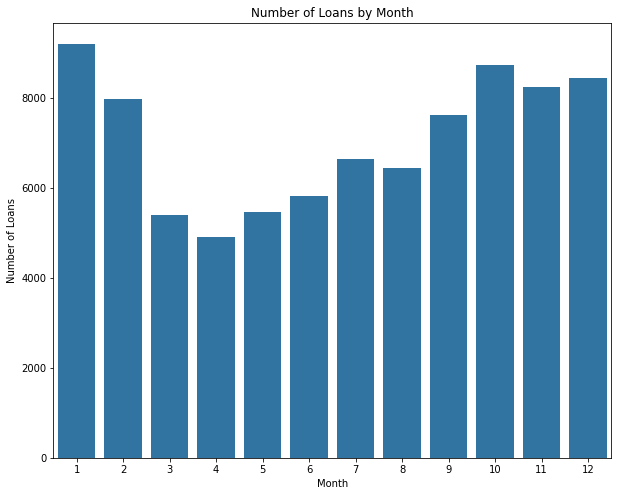

In [48]:
# How are loans distributed across each month?

# Count the number of loans in each month
month_counts = df["ListingMonth"].value_counts()

# set figsize
fig, ax = plt.subplots(figsize=(10, 8))

# Create the bar chart
sns.barplot(x=month_counts.index, y=month_counts.values, color = base_color)

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Number of Loans")
plt.title("Number of Loans by Month");

### Observation
- Loan amount has been on a continuous uptrend over the years
- January has the most number of loans

### Question

How has borrower rate changed over time?

### Visualization

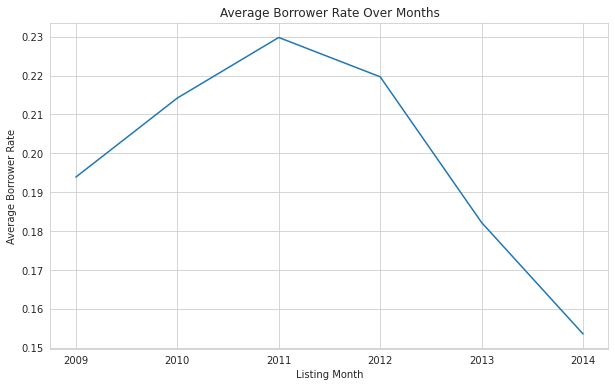

In [49]:
# Group the data by the listing year and calculate the mean borrower rate for each month
monthly_rates = df.groupby('ListingYear')['BorrowerRate'].mean().reset_index()

# Set the plot style
sns.set_style('whitegrid')

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_rates, x='ListingYear', y='BorrowerRate')

# Set the plot title and axis labels
plt.title('Average Borrower Rate Over Months')
plt.xlabel('Listing Month')
plt.ylabel('Average Borrower Rate');

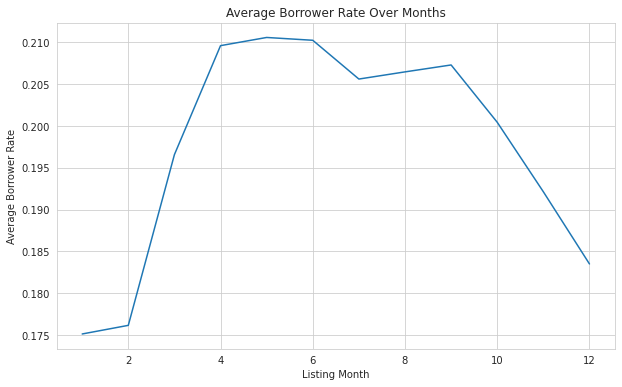

In [50]:
# Group the data by the listing month and calculate the mean borrower rate for each month
monthly_rates = df.groupby('ListingMonth')['BorrowerRate'].mean().reset_index()

# Set the plot style
sns.set_style('whitegrid')

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_rates, x='ListingMonth', y='BorrowerRate')

# Set the plot title and axis labels
plt.title('Average Borrower Rate Over Months')
plt.xlabel('Listing Month')
plt.ylabel('Average Borrower Rate');

### Observation

On yearly timeframe, Borrower rate peaked at 2011 and has been on a downtrend since then

On monthly timeframe, rates are highest during April to June but drop from october to december

### Question
How has loan status changed over time?

### Visualization

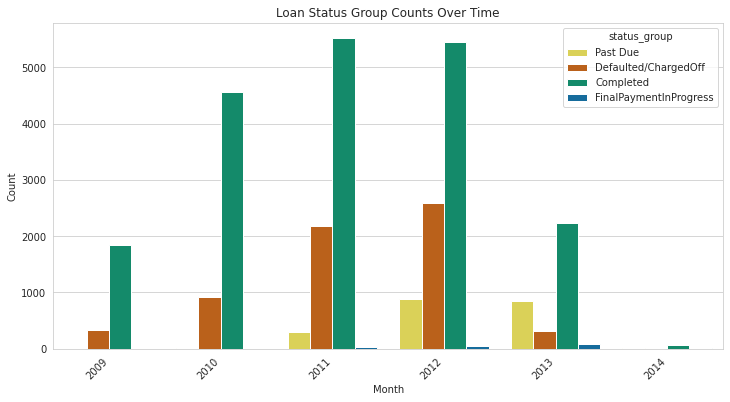

In [51]:
# create a dictionary to map loan statuses to their corresponding group
status_groups = {
    'Completed': 'Completed',
    'Defaulted': 'Defaulted/ChargedOff',
    'Chargedoff': 'Defaulted/ChargedOff',
    'Past Due (1-15 days)': 'Past Due',
    'Past Due (16-30 days)': 'Past Due',
    'Past Due (31-60 days)': 'Past Due',
    'Past Due (61-90 days)': 'Past Due',
    'Past Due (91-120 days)': 'Past Due',
    'Past Due (>120 days)': 'Past Due',
    'FinalPaymentInProgress': 'FinalPaymentInProgress'
}

# create a new column for the loan status group
df['status_group'] = df['LoanStatus'].map(status_groups)


# plot the loan status group counts over the years
colored = ['#F0E442','#D55E00','#009E73','#0072B2']

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ListingYear', hue='status_group', palette=colored)
plt.title('Loan Status Group Counts Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right');

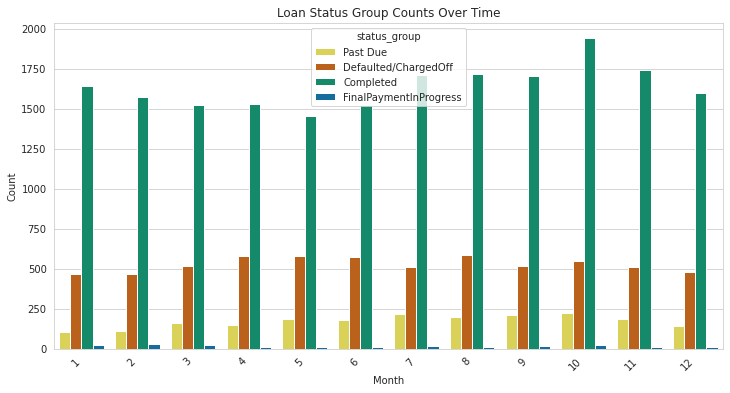

In [52]:
# Taking a closer look on a monthly timeframe

# plot the loan status group counts over months
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ListingMonth', hue='status_group', palette=colored)
plt.title('Loan Status Group Counts Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right');

### Observation
- 2011 has the highest number of completed loans
- The year with the highest delinqent loans is 2012
- October has the highest completed loans

### Question
What is the relationship between Borrower Rate and Loan Status?


### Visualization

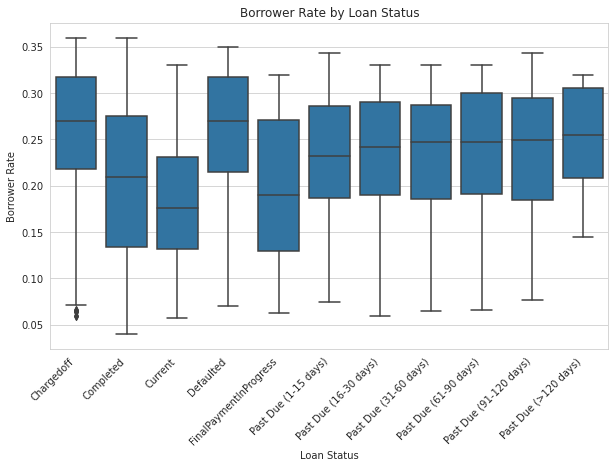

In [53]:
# create a box plot of borrower rate by loan status

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='LoanStatus', y='BorrowerRate', color = base_color)
plt.xticks(rotation=45, ha='right')
plt.title('Borrower Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Borrower Rate')
plt.show()

### Observation

We can see that the median borrower rate is generally higher for loans that are defaulted, chargedoff or past due compared to completed loans. 
Completed and current loans have median borrower rate of 0.22 and 0.18 respectively.

This suggests that lower borrower rates are associated with higher completion rates, while higher borrower rates are associated with higher rates of default, charge off, and past due status.

### Question

What is the relationship between Borrower rate and Prosper rating?

### Visualization

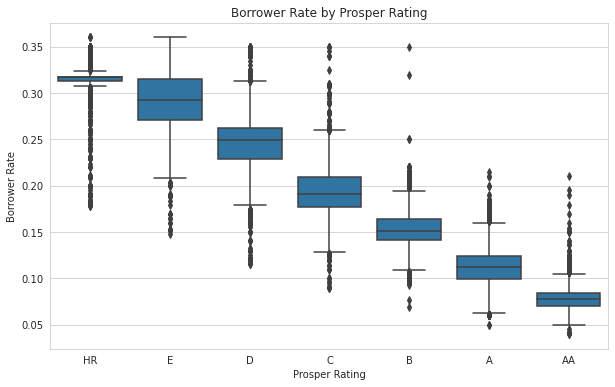

In [54]:
# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='ProsperRating (Alpha)', y='BorrowerRate', data=df, color = base_color)
plt.title('Borrower Rate by Prosper Rating')
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower Rate');

### Observation

Borrower rates are highest for HR(High risk) Prosper rating and lowest for the highest Prosper rating AA
This shows that borrowers with better Prosper rating get lower rates

### Question
What listing category is likely to 
(1) default 
(2) Be Completed

### Visualization


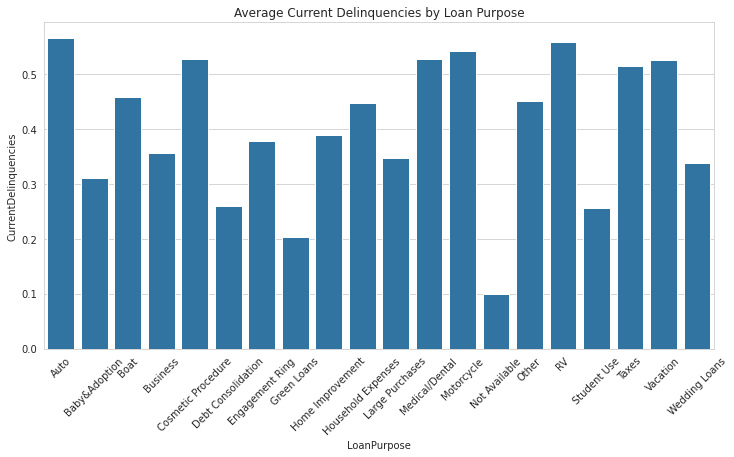

In [55]:
# create a new column with the loan purposes
df['LoanPurpose'] = df['ListingCategory (numeric)'].map(listing_category)

# group the data by loan purpose and calculate the mean current delinquencies
delinquencies_by_purpose = df.groupby('LoanPurpose')['CurrentDelinquencies'].mean().reset_index()

# create a barplot of loan purposes and current delinquencies
plt.figure(figsize=(12, 6))
sns.barplot(x='LoanPurpose', y='CurrentDelinquencies', data=delinquencies_by_purpose, color = base_color)
plt.title('Average Current Delinquencies by Loan Purpose')
plt.xticks(rotation=45);

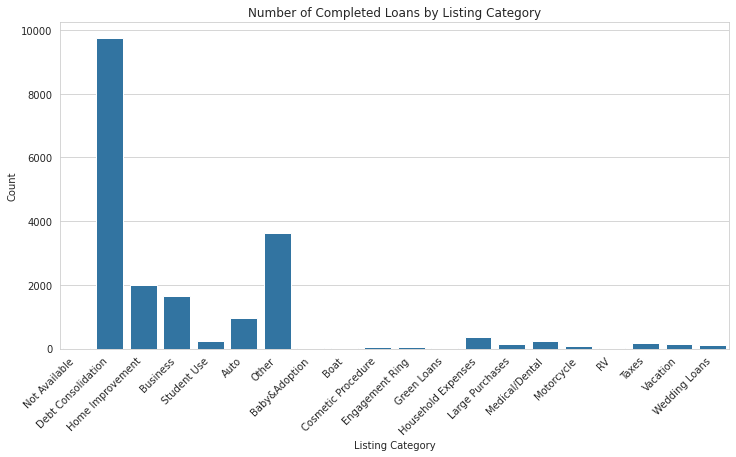

In [56]:
# create a subset dataframe with only completed loans
completed_loans = df[df['LoanStatus'] == 'Completed']

# count the number of completed loans for each listing category
listing_counts = completed_loans['ListingCategory (numeric)'].value_counts()

# map the numeric listing categories to their corresponding names
listing_counts.index = listing_counts.index.map(listing_category)

# create a bar plot of completed loans by listing category
plt.figure(figsize=(12, 6))
sns.barplot(x=listing_counts.index, y=listing_counts.values, color= base_color)
plt.title('Number of Completed Loans by Listing Category')
plt.xlabel('Listing Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right');

### Observation
- Loans requested for the purpose of Auto have the highest delinquencies
    It suggests that loans for Auto, Business, Large purchases, Medical/dental and RV may be riskier than other purposes like debt consolidation and student use.

- Loans taken for debt consolidation are most likely to be completed

### Question
What is the relationship between LoanOriginalAmount and LoanStatus?

### Visualization

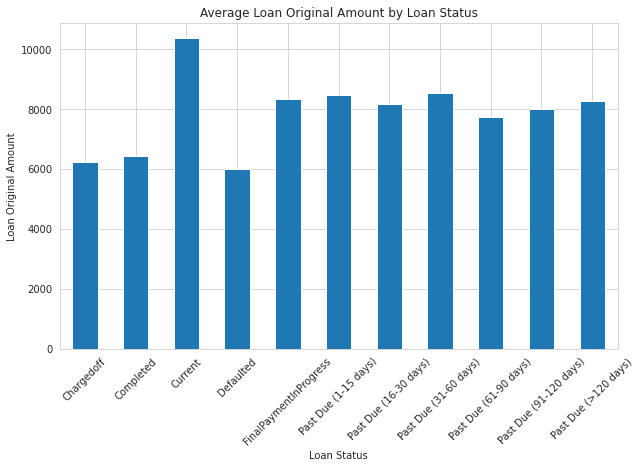

In [57]:
# Group the dataset by LoanStatus and calculate the mean loan original amount for each group
grouped = df.groupby('LoanStatus')['LoanOriginalAmount'].mean()

# Create a bar chart of the mean loan original amount for each loan status
grouped.plot(kind='bar', figsize=(10,6), color = base_color)
plt.title('Average Loan Original Amount by Loan Status')
plt.xlabel('Loan Status')
plt.xticks(rotation=45)
plt.ylabel('Loan Original Amount');

### Observation

Larger loans are more likely to be in the "Current" status, while smaller loans are more likely to be in the "Defaulted" and "Chargedoff" categories.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Strong positive correlations between Lender yield and Borrower Rate which is logical, higher borrower rates should result in higher lender yield

> Strong negative correlation between Prosper rating and borrower rate, which suggests that high prosper ratings have lower borrower rates

> 2011 had the highest borrower rates and highest completed loans  
Loans taken for debt consolidation are most likely to be completed

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Loans taken for the purpose of Auto have the highest delinquency

## Multivariate Exploration


### Question

What is the distribution of Loan amounts by Borrower rate and Prosper rating?

### Visualization

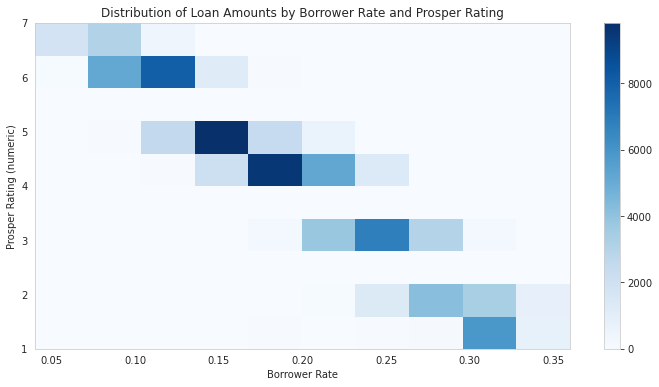

In [58]:
median_loan_by_rating_rate = df.pivot_table(index='BorrowerRate', columns='ProsperRating (numeric)', values='LoanOriginalAmount', aggfunc='median')

# plot 2D histogram
plt.figure(figsize=(12, 6))
plt.hist2d(x=df['BorrowerRate'], y=df['ProsperRating (numeric)'], bins=(10,10), cmap=plt.cm.Blues)

# add a colorbar
plt.colorbar()

# set the title and axis labels

plt.title('Distribution of Loan Amounts by Borrower Rate and Prosper Rating')
plt.xlabel('Borrower Rate')
plt.ylabel('Prosper Rating (numeric)');

### Observation

We can see that prosper ratings of 4 (same as C- rating) and above have the largest Loan amounts but lowest borrower rates



### Question

What is the average borrower rate across Loan status and income range?

### Visualization

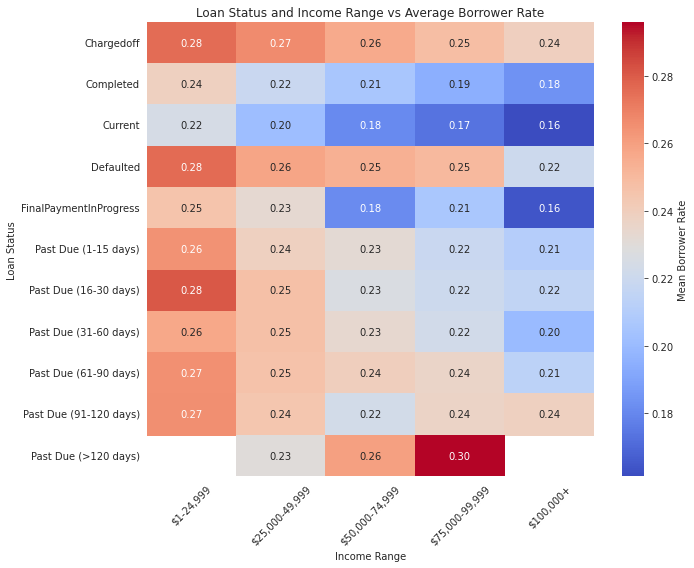

In [59]:
# create heatmap of Mean Borrower rate across Loan status and Income Range

plt.figure(figsize=(10, 8))
pivot_table = pd.pivot_table(df, values='BorrowerRate', index='LoanStatus', columns='IncomeRange', aggfunc=np.mean)
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Mean Borrower Rate'})
plt.title('Loan Status and Income Range vs Average Borrower Rate')
plt.xlabel('Income Range')
plt.xticks(rotation=45)
plt.ylabel('Loan Status')
plt.tight_layout();

### Observation

- borrowers in higher income ranges tend to have lower rates across all loan statuses, with the lowest rates concentrated in the $100,000+ income range

- Loans that are charged off or defaulted tend to have higher rates across all income ranges, while completed loans tend to have the lowest rates



### Question
How does Loan amount interact with Income range and Loan Term?

### Visualization

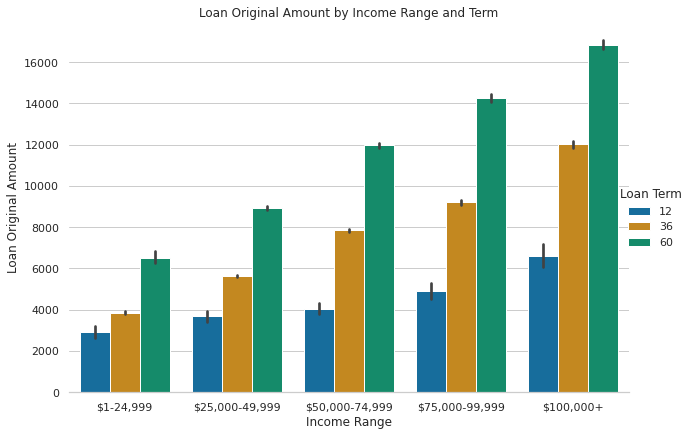

In [60]:
# create a stacked bar chart of LoanOriginalAmount by IncomeRange and Term
sns.set(style="whitegrid")
g = sns.catplot(x="IncomeRange", y="LoanOriginalAmount", hue="Term", data=df,
                kind="bar", palette="colorblind", height=6, aspect=1.5)
g.despine(left=True)
g.set_axis_labels("Income Range", "Loan Original Amount")
g.legend.set_title("Loan Term")
plt.title('Loan Original Amount by Income Range and Term');

### Observation

- The amount of loans increases as income range increases

- The chart suggests that Prosper tends to give larger loans to individuals with higher incomes and the 60-month term is the most popular among borrowers.

### Question

What is the distribution of Borrower rate by Loan status and Prosper rating?

### Visualization

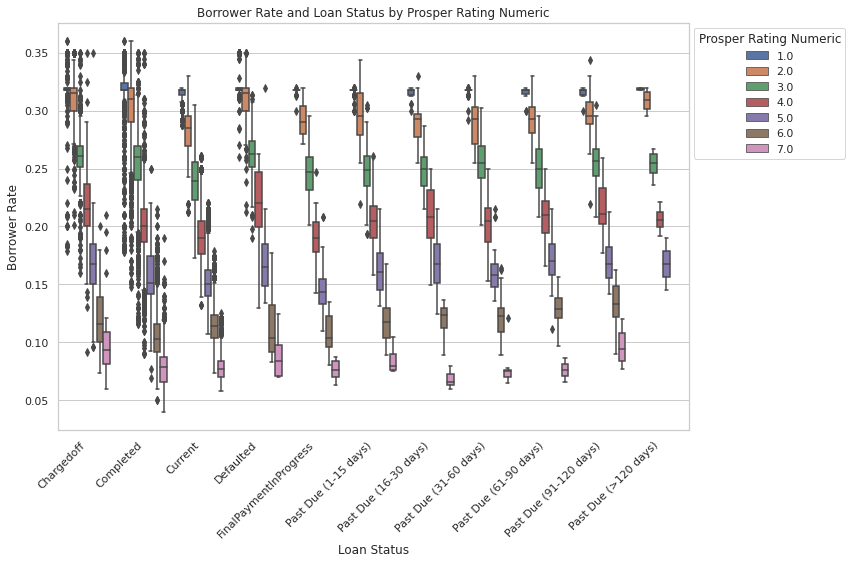

In [61]:
# create a box plot to show the distribution of borrower rate by loan status and prosper rating numeric
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='LoanStatus', y='BorrowerRate', hue='ProsperRating (numeric)')
plt.title('Borrower Rate and Loan Status by Prosper Rating Numeric')
plt.xlabel('Loan Status')
plt.ylabel('Borrower Rate')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Prosper Rating Numeric', bbox_to_anchor=(1, 1))
plt.tight_layout()

### Observation

- Borrower rate tends to be higher for loans that are charged off or defaulted compared to loans that are current or have been paid off. 

- The borrower rate tends to decrease as the Prosper rating increases, with lower ratings associated with higher rates

- Borrower rate is also lower for completed loans

### Question 
How does Borrower rate and Loan status interact with loan term?

### Visualization

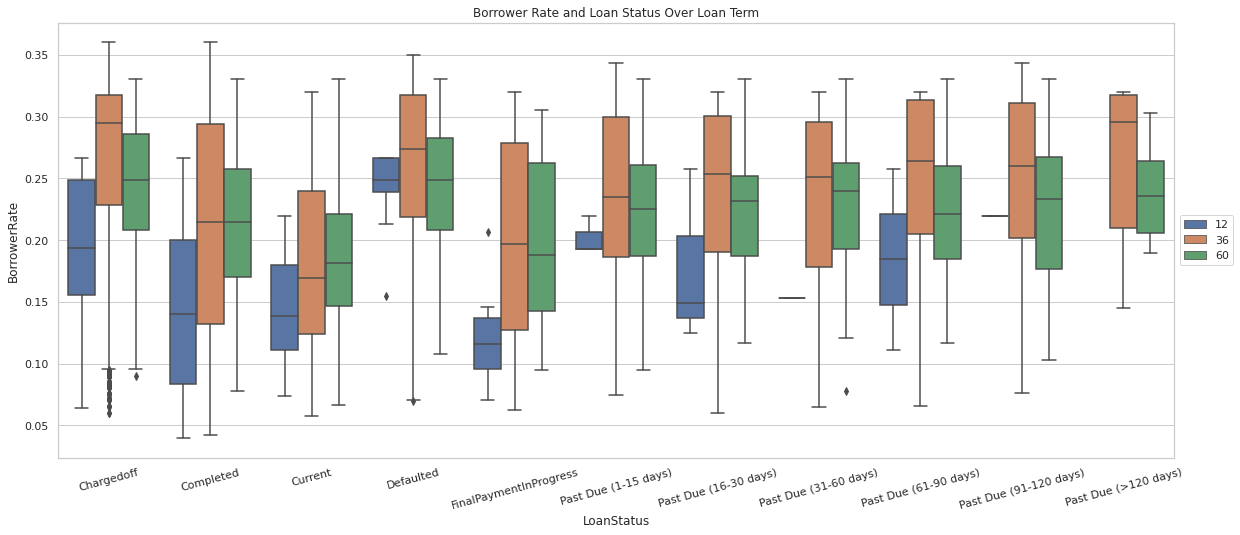

In [65]:
#Creating a boxplot for BorrowerRate, LoanStatus, and Term with the Term as color encoding
plt.figure(figsize=[20,8])
sns.boxplot(data = df, y = 'BorrowerRate', x = 'LoanStatus', hue = 'Term')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15)
plt.title('Borrower Rate and Loan Status Over Loan Term');

### Observation

- The median borrower rate is generally higher for loans that have defaulted or charged off compared to loans that are current or completed

- The median borrower rate tends to increase as the loan term gets longer, with the 60-month term having the highest median rate. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Prosper rating increased borrower amount but had negative relationship with borrower rates

> Borrower amount increased with income range

> As the Loan term increased, borrower rates generally increased

> Borrowers in higher income ranges tend to have lower rates across all loan statuses


### Were there any interesting or surprising interactions between features?

> Loan Amount increased over the years while borrower rate reduced over the years